# Importing Libraries

In [5]:
%matplotlib inline 
import os
import matplotlib.pylab as plt
import numpy as np
import ATCWallArchetype as WallHelper
import WallArchetypeObjects as Archetypes
import GMHelper
import imp

In [6]:
from matplotlib import animation, rc
rc('animation', html='html5')
from IPython.display import HTML

# Archetype IDs

In [7]:
# List of Archetypes IDs starting from the 4-story archetypes to 40-story archetypes (in 4-story increments)

# Code Enhanced Architypes Designed to ASCE 7-10 (Marafi et al. 2019 - Journal of Structural Engineering) 
ArchetypeNames08 = [ 'S4H08SEAWB', 'S8H08SEAWB', 'S12H08SEAWB', 'S16H08SEAWB', 'S20H08SEAWB', 'S24H08SEAWB', 'S28H08SEAWB', 'S32H08SEAWB', 'S36H08SEAWB', 'S40H08SEAWB']

# Code Enhanced Architypes Designed to ASCE 7-16 (Marafi et al. 2019 - Journal of Structural Engineering) 
ArchetypeNames14 = [ 'S4H14SEAWB', 'S8H14SEAWB', 'S12H14SEAWB', 'S16H14SEAWB', 'S20H14SEAWB', 'S24H14SEAWB', 'S28H14SEAWB', 'S32H14SEAWB', 'S36H14SEAWB', 'S40H14SEAWB']

# Code Minimum Archetypes Designed to ASCE 7-10 (Marafi et al. 2019 - Journal of Structural Engineering)
ArchetypeNames08PG2 = [ 'S4H08SEAWBPG2', 'S8H08SEAWBPG2', 'S12H08SEAWBPG2', 'S16H08SEAWBPG2', 'S20H08SEAWBPG2', 'S24H08SEAWBPG2', ]

# Code Minimum Archetypes Designed to ASCE 7-16 (Marafi et al. 2019 - Journal of Structural Engineering)
ArchetypeNames14PG2 = [ 'S4H14SEAWBPG2', 'S8H14SEAWBPG2', 'S12H14SEAWBPG2', 'S16H14SEAWBPG2', 'S20H14SEAWBPG2', 'S24H14SEAWBPG2',]

# Code Minimum Archetypes Designed to ASCE 7-16 + 25% Strength Increase (Marafi et al. 2020 - Earthquake Spectra)
ArchetypeNames14PG3 = [ 'S4H14SEAWBPG3', 'S8H14SEAWBPG3', 'S12H14SEAWBPG3', 'S16H14SEAWBPG3', 'S20H14SEAWBPG3', 'S24H14SEAWBPG3',]

# Code Minimum Archetypes Designed to ASCE 7-16 + 50% Strength Increase (Marafi et al. 2020 - Earthquake Spectra)
ArchetypeNames14PG4 = [ 'S4H14SEAWBPG4', 'S8H14SEAWBPG4', 'S12H14SEAWBPG4', 'S16H14SEAWBPG4', 'S20H14SEAWBPG4', 'S24H14SEAWBPG4',]

# Code Minimum Archetypes Designed to ASCE 7-16 + 1.5% Drift Limit (Marafi et al. 2020 - Earthquake Spectra)
ArchetypeNames14PG5 = [ 'S4H14SEAWBPG5', 'S8H14SEAWBPG5', 'S12H14SEAWBPG5', 'S16H14SEAWBPG5', 'S20H14SEAWBPG5', 'S24H14SEAWBPG5',]

# Code Minimum Archetypes Designed to ASCE 7-16 + 1.25% Drift Limit (Marafi et al. 2020 - Earthquake Spectra)
ArchetypeNames14PG6 = [ 'S4H14SEAWBPG6', 'S8H14SEAWBPG6', 'S12H14SEAWBPG6', 'S16H14SEAWBPG6', 'S20H14SEAWBPG6', 'S24H14SEAWBPG6',]

# Code Minimum Archetypes Designed to ASCE 7-16 + 25% Strength Increase + 1.5% Drift Limit (Marafi et al. 2020 - Earthquake Spectra)
ArchetypeNames14PG7 = [ 'S4H14SEAWBPG7', 'S8H14SEAWBPG7', 'S12H14SEAWBPG7', 'S16H14SEAWBPG7', 'S20H14SEAWBPG7', 'S24H14SEAWBPG7',]



### Import Ground Motions from M9 Simulated CSZ Earthquakes
#### Orient Ground Motion in Max Direction


In [8]:
#Specify Archetype ID
archename = 'S12H14SEAWB'

# Get Archetype Object
Archetype = Archetypes.GetArchetypeByName(archename)

# Get Archetype Period
T = Archetype.CuTa

In [9]:
# Specify Folder with all Ground Motions Time Histories
M9MotionsFolder = 'GroundMotions/M9/Realizations/Original/'

# Get Ground Motion Time Histories in the EW and NS Direction
Dt, NumPoints, GMDataX = GMHelper.ExtractOneGroundMotion(M9MotionsFolder, 'csz025-A11923-EW')
Dt, NumPoints, GMDataY = GMHelper.ExtractOneGroundMotion(M9MotionsFolder, 'csz025-A11923-NS')

# Find Max. Direction in the buildings period (CuTa used here)
GM_O = GMHelper.GetSaRotD(GMDataX,
                          GMDataY,
                          Dt, T, 0.05)

# List of Acceleration Time History
GMData = GM_O.DataRotD100[:]

### Run OpenSees Analysis

In [10]:
O_csz025 = WallHelper.AnalyzeArchetypeSingleLineElement(
            Archetype, # Archetype Object
            GMData*386.4, # Ground Motions Time History in in/s^2
            Dt, # Time Step in Seconds
            SupressOutput=False, # Supress Output, I typically turn this on when debugging
            Viewer=False, # Ignore
            Animation=False, # Ignore
            TimeHistory=True, # Specify True if running a Time History Analysis
            PushOver=False, # Specify True if running a Pushover Analysis
            OpenSeesCommand='OpenSees', # Name of OpenSees Executable File, either OpenSees, OpenSeesSP                             
            T1=None, # 1st Mode Period of Structure for Damping (None if you want a modal analysis to run)
            T2=None, # 2nd Mode Period of Structure for Damping (None if you want a modal analysis to run)
            EnhancedOutput=True, # Generates Lots of Output
            PDeltaColumn=True, # Include P-Delta Columns                             
            CyclicStatic=False, # Run a Cyclic Static Pushover
            DriftHistory=None, # Cyclic Static Pushover History
            POModalForces=True, # Specify Forces in Cyclic Static or Static Pushover to match Modal Participation Ratios
            heff=None, # Ignore
            ConstantWallAxialForce=False, # Ignore
            ApplyPDeltaLoad=True, # Apply Gravity Load in the P-Delta Column
            DebugMode=False, # Does not Delete Output Files (recorders) after successful run
            RegularizeSteel=False, # Regularize Steel, Default is False (see Marafi et al. 2018 - JOSE)
            MaxPORoofDrift=0.02, # Specify Pushover Drift Limit
            PlotSections=False, # Plot Fiber Sections (good for checking model)
            RegularizeFracture=False, # Ignore
            NoOfIterations=10000, # Number of Iterations to Solve within Element
            Tolerance=1e-6, # Convergence Tolerance 
            CrushingStrengthRatio=0.2, # Strength of Concrete Crushing (ratio of Peak Concrete Strength)
            POELFForces=False, # Use Pushover ELF Forces
            CuTa=None, # Specify CuTa for Pushover ELF Forces
            GfccOGfc=1.75, # Confined to Unconfined Concrete Concrete Fracture 
            ConcreteMaterialModel='Concrete02IS', # Concrete Material Model (either Concrete02, Concrete02IS, Concrete04, ConcreteCM)
            ConfinementModel='SaatRazvi', # Concrete Cofninement Model (either SaatRazvi, Mander, Richart)
            SteelMaterialModel='Steel02Fatigue', # Steel Material Model (either Steel02, Steel02Fatigue, )
            SteelUltimateStrainTension=0.2, # Ultimate Strain of Steel in Tension
            SteelPostYieldStiffness=0.006, # Steel Post Yield Stiffness (as a percentage of the Elastic Stiffness)
            WallAxialLoadMultiplier=1.0, # Multiplier Applied to the Wall Axial Loads (see Marafi et al. 2018 - JOSE)
            UseForceBasedElements=False, # Use Force Based Elements instead of Displacement Elements (see Marafi et al. 2018 - JOSE)
            DivisionsPerStory=6, # Number of Wall Elements Per Story
            GfcOfpc=2.0, # Ratio of Crushing Energy as a ratio of the f'c
            NoOfIntPoints=5, # Number of Integration Points Per Wall Elements
            UnconfinedBeta = 0.01, # Unconfined Concete Residual Strength
            Regularized = True, # Regular Concrete Post-Peak Response (see Marafi et al. 2018 - JOSE)
            WallThicknessMultipler = 1.0, # Multiplier Applied to the Wall Thickness (see Marafi et al. 2018 - JOSE)
            FBE_Tolerance = 1e-6, # Convergence Tolerance Applied to the Force-Based Element
            ModalDamping = True, # Use Modal Damping Instead of Rayleigh Damping
            Zeta = 0.025, # Damping Ratio
            UseTBIZeta = False, # Use TBI Recommendation for Damping
            IncludeSupplementalRayleigh = True, #Include Supplemental Rayleigh Damping to dampen out the Higher Modes, see (see Marafi et al. 2019 - JOSE)
            Options=None, # Dictionary for Additional Options
    )


Running OpenSees Tcl File: PWA.tcl


### Plot Deformations


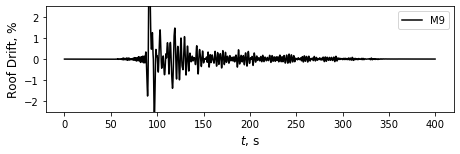

In [15]:
plt.figure(figsize=(6.5,2.25))

O = O_csz025
plt.plot(np.arange(0,len(O.RoofDisplacements[:,1]),1)*Dt, O.RoofDisplacements[:,1]/O.YGrids[-1]*100, color='#000000', label='M9')

plt.xlabel('$t$, s', fontsize=12)
plt.ylabel('Roof Drift, %', fontsize=12)

plt.ylim([-2.5,2.5])

plt.legend()

plt.tight_layout()

plt.savefig('Figures/RooftDriftVsTime.png', dpi=300)

### Plot Max. Shear wrt. Story

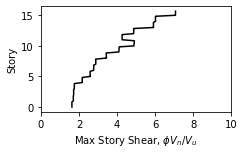

In [29]:
O = O_csz025

MaxStep = len(O.CoreForces[:,0])

plt.figure(figsize=(3.5, 2.25))

Shears = []
if O.CoupledDirection:
    for i in range(int(len(O.CoreForces[0,1:])/6-1)):
        Shears.append(np.max(np.abs(O.CoreForces[:MaxStep, 1 + 6 * i ] + O.CoreForces[:MaxStep, 1 + 6 * i + 6])))
        PhiVn = 0.75 * 8. * np.sqrt(O.Archetype.fpc * 1000) * (
        (O.Archetype.b_f - O.Archetype.CouplingBeams) * O.Archetype.t) / 1000

    plt.plot(PhiVn / Shears, np.arange(len(Shears)) / float(O.NoOfDivisionsPerFloor) / 2., color='#000000',
             linewidth=1.5)
else:
    for i in range(int(len(O.CoreForces[0,1:])/6-1)):
        Shears.append(np.max(np.abs(O.CoreForces[:MaxStep, 1 + 6 * i ])))
        PhiVn = 0.75 * 8. * np.sqrt(O.Archetype.fpc * 1000) * (O.Archetype.l_w * 2. * O.Archetype.t) / 1000

    plt.plot(PhiVn/Shears, np.arange(len(Shears))/float(O.NoOfDivisionsPerFloor), color='#000000', linewidth=1.5)

# plt.xlim([0, np.ceil(max(Shears)/1000)*1000])
plt.xlim([0, 10])

plt.xlabel('Max Story Shear, $\phi V_n/V_u$')
plt.ylabel('Story')

plt.tight_layout()

plt.savefig('Figures/NormShearVsStory.png', dpi=300)


### Plot 1st Story Moment wrt. 1st Story Drift

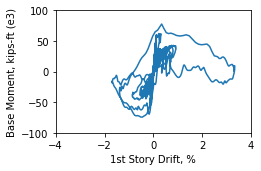

In [33]:

plt.figure(figsize=(3.5, 2.25))

maxlength = len(O.BaseMoment[:])
Story = 4
Basement = 3
RelDisp = O.AllDispl[:,1 + Story] - O.AllDispl[:,1 + Basement]
StoryHeight = O.YGrids[Story] - O.YGrids[Basement]
plt.plot(RelDisp/StoryHeight*100, 
         O.BaseMoment[:]/12./1000,
         color='C0', linewidth=1.5)

plt.ylim([-100, 100])
plt.xlim([-4, 4])

plt.xlabel('1st Story Drift, %')
plt.ylabel('Base Moment, kips-ft (e3)')


plt.savefig('Figures/MomentWRTDrift.png', dpi=300)


# Plot Max. Interstory Drift wrt. Story

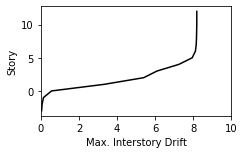

In [50]:
O = O_csz025

MaxStep = len(O.CoreForces[:,0])

plt.figure(figsize=(3.5, 2.25))

plt.plot(np.array(O.InterStoryDrifts)*100., np.arange(1,(len(O_csz025.Archetype.YGrids)))-4, color='#000000', linewidth=1.5)

# plt.xlim([0, np.ceil(max(Shears)/1000)*1000])
plt.xlim([0, 10])

plt.xlabel('Max. Interstory Drift')
plt.ylabel('Story')

plt.tight_layout()

plt.savefig('Figures/MaxInterStoryDrift.png', dpi=300)


### Animate Wall Deformations and Strain Results

In [52]:
#Specify Path to ffmpeg
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'

#### Plot Deformations and Strains

In [57]:
import AnimationHelpers
anim = AnimationHelpers.AnimateWallDeformation(O_csz025, Dt, Skip=50, 
                              GravitySystemXLoc = (100*12-O.Archetype.l_w)/2. + O.Archetype.l_w, 
                              GammaRacking = 1. + O.Archetype.l_w / 2. / (100*12-O.Archetype.l_w)/2.,
                              AnimationFileName = 'csz025_Seattle')
plt.close()
from IPython.display import HTML
HTML(anim.to_html5_video())

/Users/marafi/Dropbox/Research/Opensees/SRCSWArchetypes/AnimationHelpers.py:209: UserWarning: No contour levels were found within the data range.
  cs = ax.contour(X, Y, Z, levels, cmap=cmap, alpha=0.5, extend='both')
/Users/marafi/Dropbox/Research/Opensees/SRCSWArchetypes/AnimationHelpers.py:506: UserWarning: No contour levels were found within the data range.
  cs = ax.contour(X, Y, Z, levels, cmap=cmap, alpha=0.5, extend='both')
/Users/marafi/Dropbox/Research/Opensees/SRCSWArchetypes/AnimationHelpers.py:506: UserWarning: No contour levels were found within the data range.
  cs = ax.contour(X, Y, Z, levels, cmap=cmap, alpha=0.5, extend='both')


#### Plot Normalized Strains

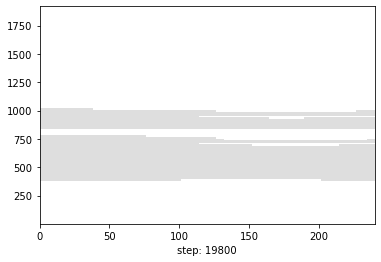

In [61]:
# Plotting strains in the wall normalized by the concrete crushing strain, steel yield strain, and steel ultimate strain
import AnimationHelpers
imp.reload(AnimationHelpers)
anim = AnimationHelpers.AnimateNormalizedStrains(O_csz025, 100)
plt.close()
from IPython.display import HTML
HTML(anim.to_html5_video())